In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [20]:
img1 = cv2.imread('/Users/hafsatariq/Desktop/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('/Users/hafsatariq/Desktop/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [21]:
img2 = cv2.resize(img2, (600, 600))

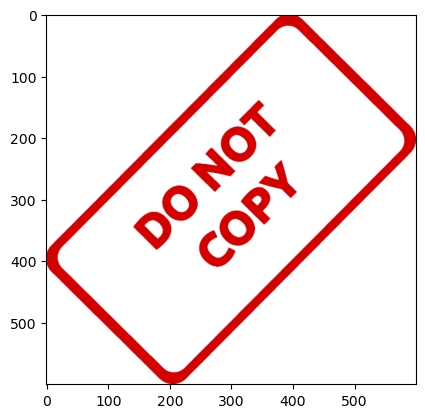

In [22]:
plt.imshow(img2)

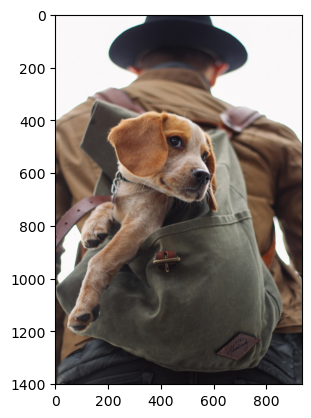

In [23]:
plt.imshow(img1)

In [24]:
img1.shape

(1401, 934, 3)

In [25]:
#Creating region of interest near bottom right

In [26]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [27]:
roi = img1[y_offset:1401, x_offset:934]

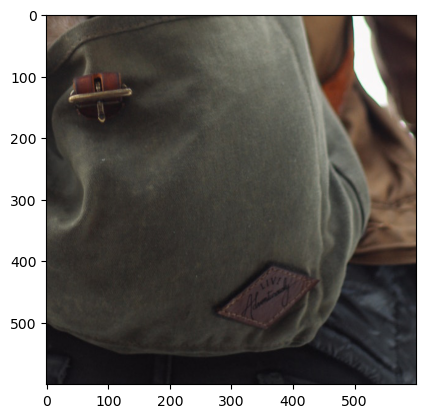

In [28]:
plt.imshow(roi)

In [29]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

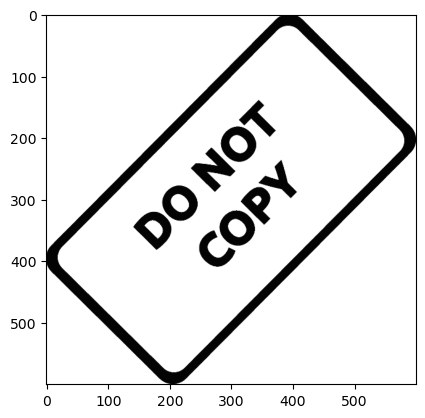

In [30]:
plt.imshow(img2gray, cmap = 'gray')

In [39]:
#Inverse
mask_inv = cv2.bitwise_not(img2gray)

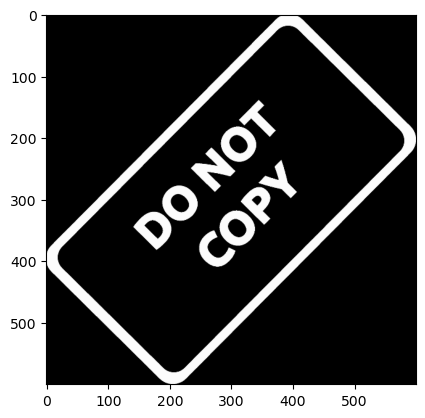

In [40]:
plt.imshow(mask_inv, cmap = 'gray')

In [41]:
mark_inv.shape

(600, 600)

In [42]:
#Add 3rd element for them to be similar


In [43]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [ ]:
#white_background

In [44]:
white_background.shape

(600, 600, 3)

In [45]:
bk = cv2.bitwise_or(white_background, white_background, mask = mask_inv)

In [46]:
bk.shape

(600, 600, 3)

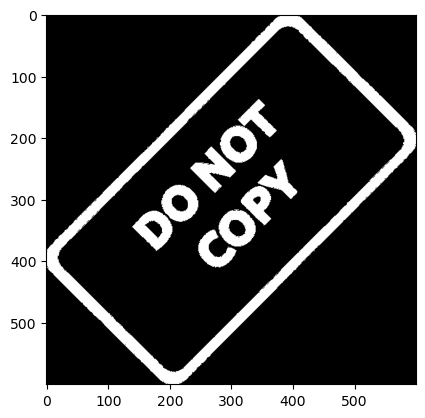

In [47]:
plt.imshow(bk)

In [48]:
fg = cv2.bitwise_or(img2, img2, mask = mask_inv)

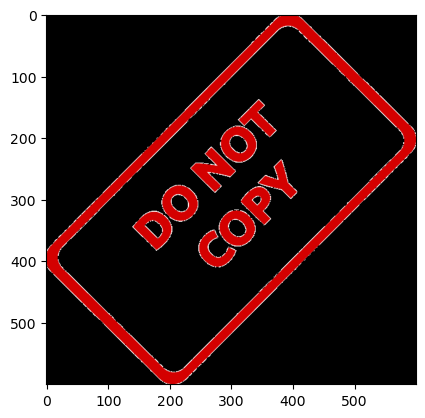

In [49]:
plt.imshow(fg)

In [50]:
final_roi = cv2.bitwise_or(roi, fg)

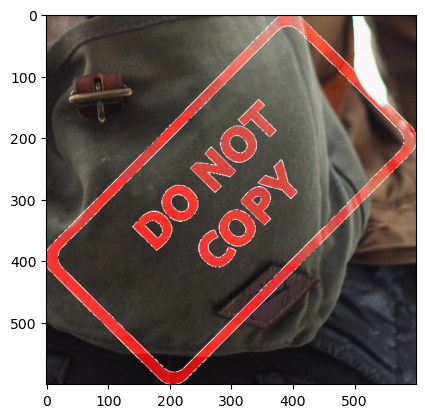

In [51]:
plt.imshow(final_roi)

In [52]:
large_img = img1

In [53]:
small_img = final_roi

In [55]:
large_img[y_offset:y_offset + small_img.shape[0], x_offset:x_offset + small_img.shape[1]] = small_img

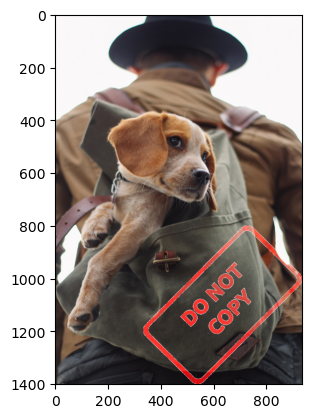

In [56]:
plt.imshow(large_img)